In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecom_data1.tsv',sep = '\t')
col = ['id' , 'item','date','price','unit']
df.columns = col


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['price']*df['unit']
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df.drop('date' ,axis=1, inplace=True)

In [4]:
df.head()

,id,item,price,unit,revenue,month,year
0,D80,Diapers,11.56,102,1179.12,1,2017
1,D3248,Diapers,12.21,93,1135.53,1,2017
2,D1714,Diapers,11.54,75,865.50,1,2017
3,D1408,Diapers,13.16,94,1237.04,1,2017
4,D4564,Diapers,13.09,86,1125.74,1,2017


In [5]:
df.describe()

,price,unit,revenue,month,year
count,461999.000000,461999.000000,461999.000000,461999.000000,461999.000000
mean,27.144958,20.110141,720.099744,6.500921,2018.009093
std,29.783308,22.913053,1819.603818,3.460029,0.825673
min,2.330000,0.000000,0.000000,1.000000,2017.000000
25%,8.800000,7.000000,68.320000,4.000000,2017.000000
50%,9.780000,11.000000,174.230000,7.000000,2018.000000
75%,55.400000,24.000000,570.330000,10.000000,2019.000000
max,159.530000,595.000000,59357.200000,12.000000,2020.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461999 entries, 0 to 461998
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       461999 non-null  object 
 1   item     461999 non-null  object 
 2   price    461999 non-null  float64
 3   unit     461999 non-null  int64  
 4   revenue  461999 non-null  float64
 5   month    461999 non-null  int64  
 6   year     461999 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 24.7+ MB


In [9]:
df['item'].value_counts()


Cereals       220000
Headphones    132000
Diapers       109999
Name: item, dtype: int64

In [10]:
df['id'].value_counts()


D80      1100
C6799    1100
C2408    1100
C3089    1100
C8744    1100
         ... 
H86      1100
H2244    1100
H2831    1100
H1747    1100
D9775    1099
Name: id, Length: 420, dtype: int64

In [11]:
itemwise_grouped = df.groupby('item')
itemwise_group = itemwise_grouped.agg({
    'unit':'sum',
    'revenue':'sum'
})
itemwise_group.columns = ['total_sales','total_rev']
itemwise_group = itemwise_group.round(2)

In [12]:
# itemwise_group['average_unit_price'] = itemwise_group['total_rev']/itemwise_group['total_sales']
itemwise_group

,total_sales,total_rev
item,,
Cereals,4498963,5.218976e+07
Diapers,1784135,1.748693e+07
Headphones,3007767,2.630087e+08


# total sales and revenue , item wise

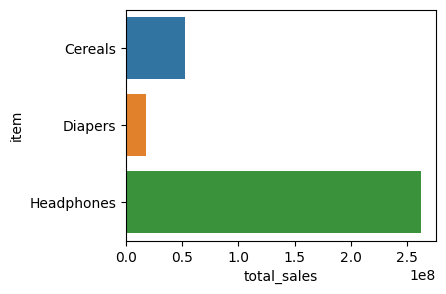

In [16]:
plt.figure(figsize=(4,3))
sns.barplot(data = itemwise_group , x = 'total_rev' , y = itemwise_group.index)
plt.show()

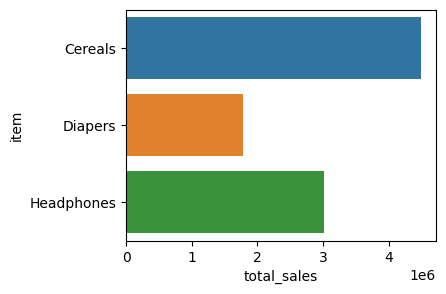

In [17]:
plt.figure(figsize=(4,3))
sns.barplot(data = itemwise_group , x = 'total_sales' , y = itemwise_group.index)
plt.show()

# year wise data

In [18]:
year_wise = df.groupby(['item','year']).agg({
    'revenue':'sum',
    'unit':'sum',
    'price':'mean'
}).reset_index()

In [19]:
# year_wise = year_wise.reset_index()
year_wise

,item,year,revenue,unit,price
0,Cereals,2017,1.337337e+07,1152235,10.002002
1,Cereals,2018,1.692748e+07,1459393,9.997035
2,Cereals,2019,2.146712e+07,1850793,9.998942
3,Cereals,2020,4.217909e+05,36542,9.966270
4,Diapers,2017,4.482259e+06,457015,8.804087
5,Diapers,2018,5.661618e+06,578527,8.796482
6,Diapers,2019,7.199266e+06,733796,8.803224
7,Diapers,2020,1.437896e+05,14797,8.753560
8,Headphones,2017,6.749008e+07,771816,70.995978
9,Headphones,2018,8.523501e+07,974336,71.027915


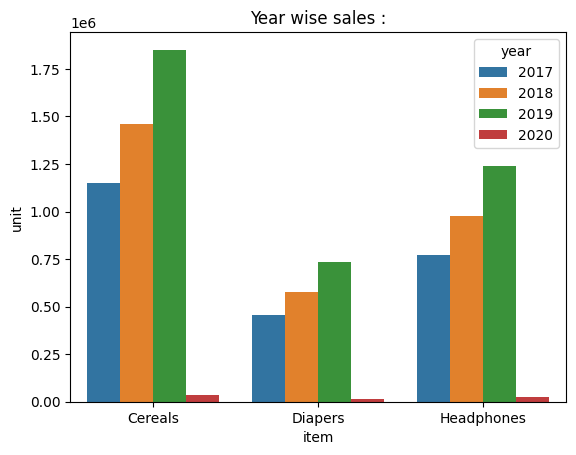

In [20]:
sns.barplot(data=year_wise , x = 'item' , y = 'unit' , hue = 'year')
plt.title("Year wise sales :")
plt.show()

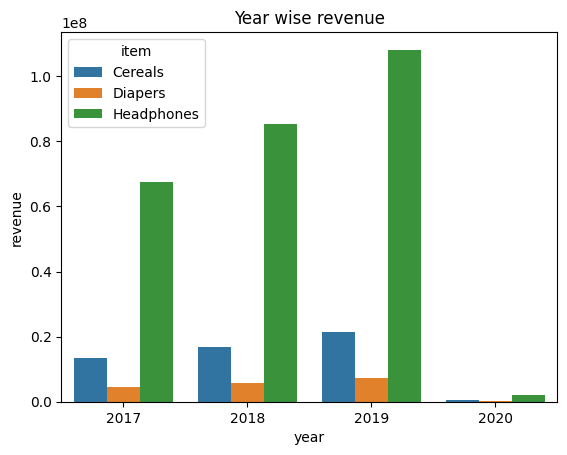

In [28]:
sns.barplot(data=year_wise , x = 'year' , y = 'revenue' , hue = 'item')
plt.title("Year wise revenue")
plt.show()

### year to year steady growth can be seen

# Lets see MOnth wise sales of item

In [37]:
month_wise = df.groupby(['item','month']).agg({
    'revenue':'sum',
    'unit':'sum',
    'price':'mean'
}).reset_index()

In [38]:
month_wise

,item,month,revenue,unit,price
0,Cereals,1,5221682.99,450398,9.996128
1,Cereals,2,3404833.76,293461,9.996783
2,Cereals,3,3800288.32,327208,10.000759
3,Cereals,4,3670147.52,316169,10.002736
4,Cereals,5,4520697.02,389876,9.991021
5,Cereals,6,4519303.71,389564,10.000520
6,Cereals,7,5561319.78,479661,10.006975
7,Cereals,8,4154194.84,357762,9.999395
8,Cereals,9,4127481.32,355837,9.999039
9,Cereals,10,3721946.60,320820,9.997278


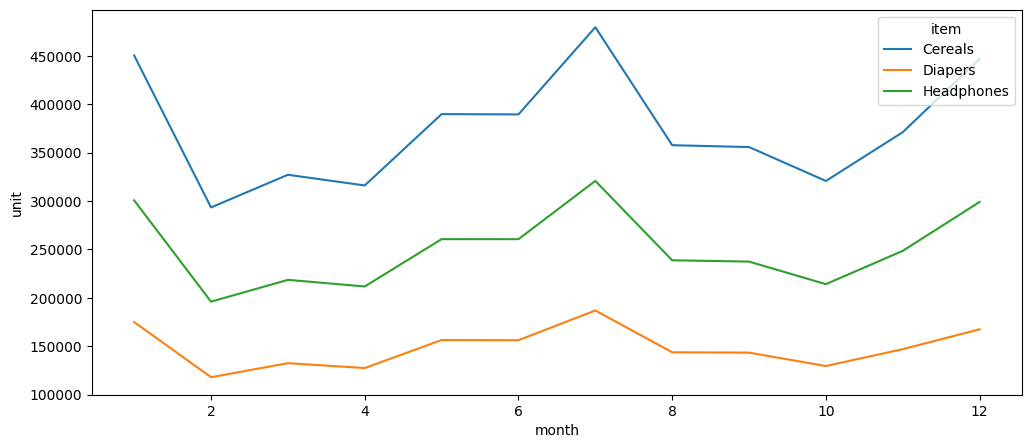

In [39]:
plt.figure(figsize=(12,5))

sns.lineplot(data=month_wise , x='month' , y='unit' , hue='item')
plt.show()

### every july there is increse in sales of every item

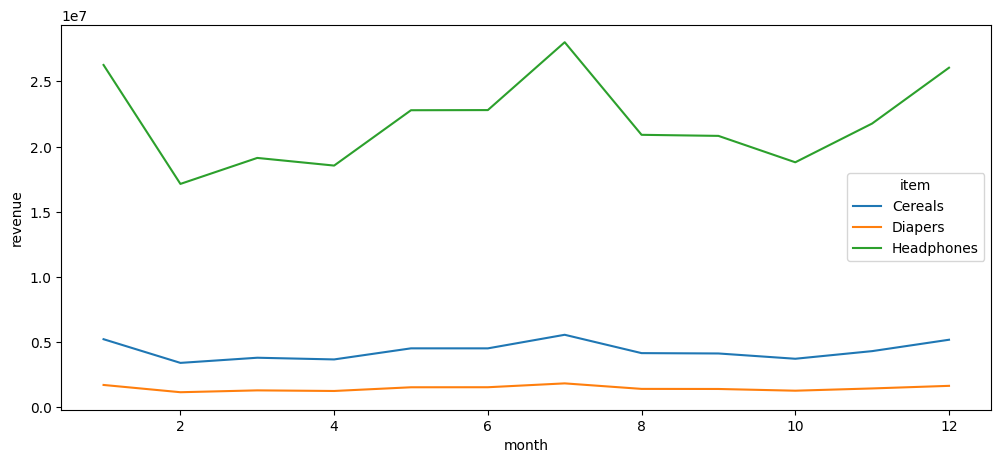

In [41]:
plt.figure(figsize=(12,5))
sns.lineplot(data=month_wise , x='month' , y='revenue' , hue='item')
plt.show()

### every july there is increse in revenue(obviously due to sales) of every item

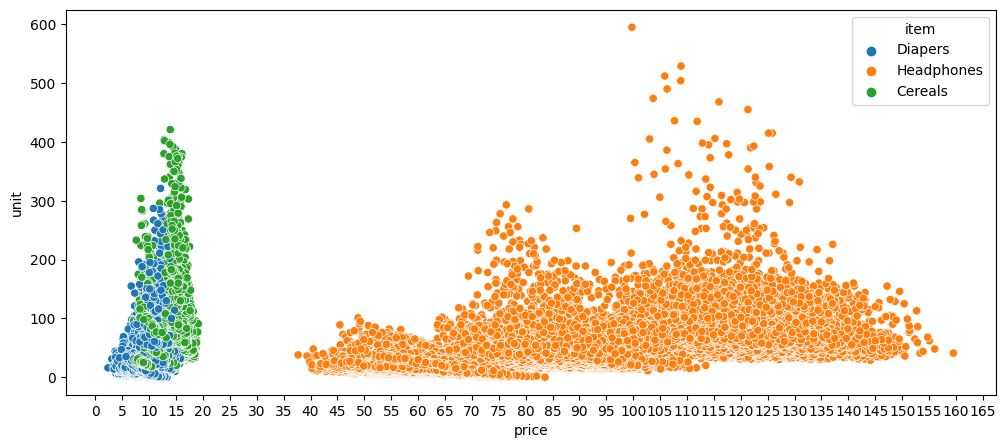

In [42]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df , x='price' , y='unit' , hue='item')
plt.xticks(np.arange(0,int(df.price.max())+10 , 5))
plt.show()

### price range that gives maximum sales
#### Diapers :- 9-14
#### Cereals :- 14-20
#### HeadPhone :- 80-130

# Lets analyze Id wise every item. 

In [106]:
grouped_data = df.groupby(['item','id']).sum().sort_values(['item','revenue'] , ascending = False).reset_index()

# top 5 ids per item ,with highest sales.

In [135]:
result_df = grouped_data.groupby('item').head(5).reset_index(drop = True)
result_df

,item,id,price,unit,revenue,month,year
0,Headphones,H27,132588.11,83311,10006794.84,7151,2219810
1,Headphones,H6483,132260.69,83454,10004472.26,7151,2219810
2,Headphones,H349,132260.19,83353,9974949.51,7151,2219810
3,Headphones,H516,132093.24,83358,9968511.20,7151,2219810
4,Headphones,H2305,131448.57,83800,9959651.03,7151,2219810
5,Diapers,D1053,13183.07,59389,709940.60,7151,2219810
6,Diapers,D4231,13252.49,59238,708571.36,7151,2219810
7,Diapers,D3248,13199.40,59006,705384.54,7151,2219810
8,Diapers,D1714,13243.92,58852,705091.63,7151,2219810
9,Diapers,D9387,13229.72,58799,704960.92,7151,2219810


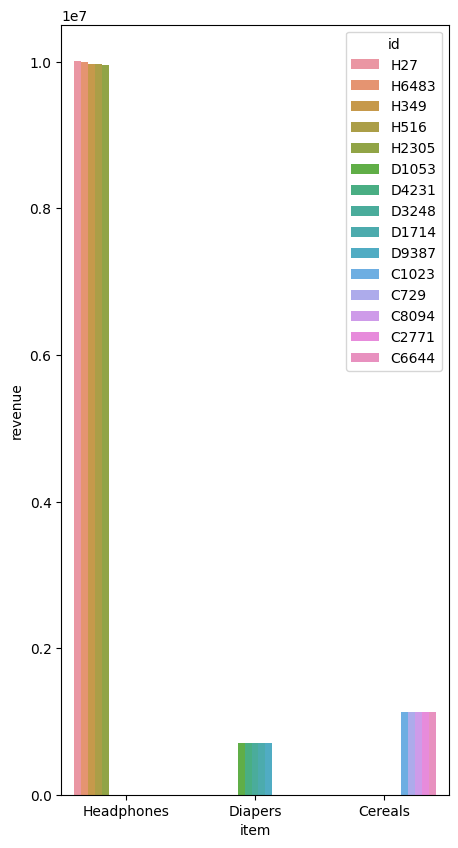

In [138]:
plt.figure(figsize=(5,10))
sns.barplot(data = result_df , x = 'item' , y = 'revenue' , hue='id')
plt.show()